In [153]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, func

In [154]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [155]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [156]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [157]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)


In [158]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [159]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [160]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [161]:
# Find the most recent date in the data set.


In [162]:
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [163]:
#week_ago = dt.date.today() - dt.timedelta(days=7)
#query_date = dt.date(2011, 4, 8) - dt.timedelta(days=7)


In [164]:
# Calculate the date one year from the last date in data set.
#lastdate = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#lastdate

In [165]:

#Select only the "date" and "prcp" values.


#session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>lastdate).order_by(Measurement.date).all()

In [166]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
lastdate = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

prep = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>lastdate).order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column

#Save the query results to a Pandas DataFrame to create date and precipitation columns (2 points)

prep_analysis_df = pd.DataFrame(prep, columns=['Date', 'Precipitation'])
prep_analysis_df.set_index('Date', inplace=True)

# Sort the dataframe by date
prep_analysis_df.sort_values(by='Date')
prep_analysis_df.head()


# Use Pandas Plotting with Matplotlib to plot the data




,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


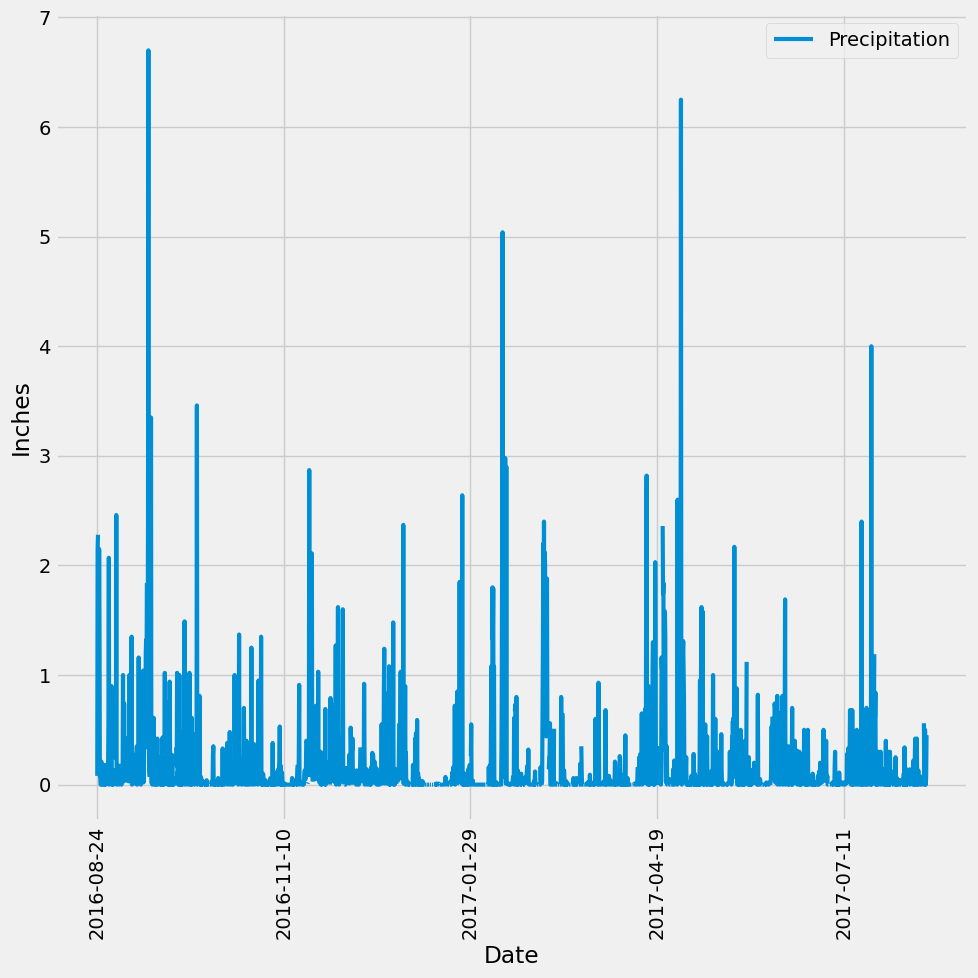

In [167]:
prep_analysis_plot=prep_analysis_df.plot(figsize=(10,10),legend=True,linewidth=3,grid=True,rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()

plt.show()

In [168]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prep_analysis_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [169]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [170]:
# Design a query to calculate the total number stations in the dataset
#stations = session.query(func.count((Station))).distinct().all()
#stations

stations=session.query(func.count(Station.id)).distinct().all()
stations

[(9,)]

In [174]:
#OR 

In [175]:
stat_analy = session.query(Station).group_by(Station).distinct().count()
stat_analy

9

In [176]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#active_stations = session.query(X, func.count()).\
    #group_by()\
    #order_by(func.count().desc()).all()
    
    
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                       group_by(Measurement.station).\
                       order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [177]:
greatest_number = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).first()
greatest_number 

('USC00519281', 2772)

In [178]:
print(f"Station ID {greatest_number}  has the greatest number of observations") 

Station ID ('USC00519281', 2772)  has the greatest number of observations


In [179]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#sel = [Measurement.station, 
#       func.min(Measurement.), 
  #     func.max(Measurement.), 
  #     func.avg(Measurement.), 
  #     func.avg(Measurement.)]
#may_averages = session.query(*sel).\
 #   filter(Measurement. == "USC00519281").\
 #   group_by(Measurement.).\
#may_averages

In [180]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [181]:
sel = [Measurement.station,
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
low_high_avg = session.query(*sel).\
        filter(Measurement.station == 'USC00519281').\
        group_by(Measurement.station)

for station in low_high_avg:
    print(station)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [182]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#using lastdate for the 12 months to plot 
active  = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
                            filter(Measurement.date >= lastdate).all()
active

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [183]:
active_df = pd.DataFrame(active)
active_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


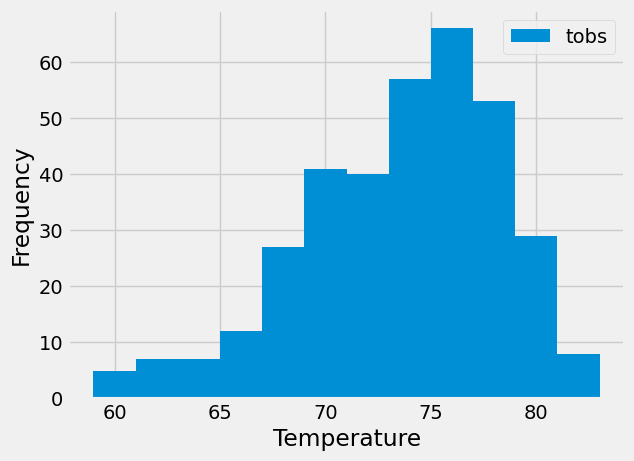

In [184]:
#Plot the results as a histogram with bins=12, as the following image shows:
plt.hist(active_df,bins=12, label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Close session

In [185]:
# Close Session
session.close()